In [1]:
#Some basic setups
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pip install bootstrapped

  Preparing metadata (setup.py) ... done
  Created wheel for bootstrapped: filename=bootstrapped-0.0.2-py2.py3-none-any.whl size=13932 sha256=b9afa93f2bd01e29b579ef259416d18b6c96b5ff6d6333b0133eb6bd7b65d11d
  Stored in directory: /root/.cache/pip/wheels/63/89/c7/09fd0b2ce6a69f0b5884df971b0de884500fe20837a8a3ab7f
Successfully built bootstrapped


In [7]:
#Replacement for ISLR2 library
import statsmodels.api as sm
# different approach with sklearn
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

#Replacement for boot library
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

#We can try using get_dummies from panda library for binarization.

#Replacement for FNN library for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#Replacement for leaps library
from sklearn.feature_selection import SelectKBest, f_regression
from mlxtend.feature_selection import ExhaustiveFeatureSelector

#Replacement for caTools library
from sklearn.model_selection import train_test_split

#Replacement for glmnet library for CV
from sklearn.linear_model import ElasticNetCV

#Replacement for glmnet library for Ridge and Lasso
from sklearn.linear_model import ElasticNet

#Replacement for pls library
from sklearn.cross_decomposition import PLSRegression

#import necessary packages
import sklearn.model_selection as skm

In [8]:
df = pd.read_csv("/content/dataQTM.csv")
#M = 0, B = 1
y = df['diagnosis']
X = df.drop(['diagnosis', 'id'], axis=1).astype('float64')
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, train_size= 0.7, random_state=123)

In [34]:
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from matplotlib.pyplot import subplots
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

K=10
kfold = skm.KFold(K, random_state=0, shuffle=True)
lassoCV = skl.ElasticNetCV(n_alphas=100,
                           l1_ratio=1,
                           cv=kfold)
scaler = StandardScaler(with_mean=True, with_std=True)
pipeCV = Pipeline(steps=[('scaler', scaler), ('lasso', lassoCV)])
pipeCV.fit(X_train, y_train)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008474124331257826, tolerance: 0.008135474860335197
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010329545302855792, tolerance: 0.008135474860335197
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010471014417145597, tolerance: 0.008135474860335197
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:6

0.0005358642519512254

In [39]:
print(X_train.columns.values)
print(tuned_lasso.coef_)
non_zero_coefficients = np.sum(tuned_lasso.coef_ != 0)
print("Optimal number of features:", non_zero_coefficients)

['radius_0ean' 'texture_0ean' 'peri0eter_0ean' 'area_0ean'
 's0oothness_0ean' 'co0pactness_0ean' 'concavity_0ean'
 'concave points_0ean' 'sy00etry_0ean' 'fractal_di0ension_0ean'
 'radius_se' 'texture_se' 'peri0eter_se' 'area_se' 's0oothness_se'
 'co0pactness_se' 'concavity_se' 'concave points_se' 'sy00etry_se'
 'fractal_di0ension_se' 'radius_worst' 'texture_worst' 'peri0eter_worst'
 'area_worst' 's0oothness_worst' 'co0pactness_worst' 'concavity_worst'
 'concave points_worst' 'sy00etry_worst' 'fractal_di0ension_worst']
[-0.00063422 -0.00955927 -0.01835625 -0.01668913  0.00223515  0.10250134
 -0.04705801 -0.05817033  0.          0.01446711 -0.13461578  0.02432197
 -0.00204517  0.09340139 -0.06390885  0.03282367  0.08357089 -0.0594572
  0.          0.00152563 -0.43179744 -0.07783095  0.          0.28501125
 -0.          0.00227752 -0.06321993 -0.08074136 -0.04887954 -0.05661267]
Optimal number of features: 26


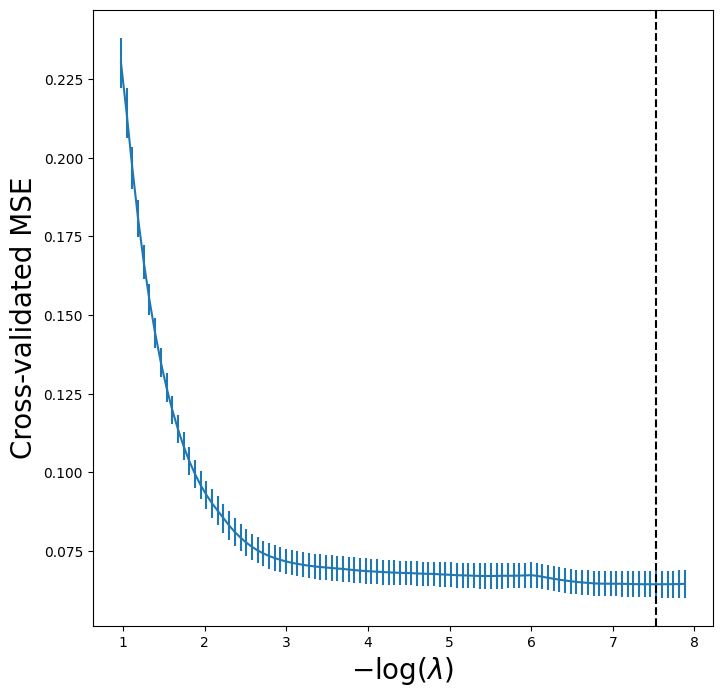

In [36]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
tuned_lasso.mse_path_.mean(1),
yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [37]:
lasso = skl.ElasticNet(alpha=tuned_lasso.alpha_, l1_ratio=1)
scaler = StandardScaler(with_mean=True, with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('lasso', lasso)])
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.571e-02, tolerance: 9.190e-03
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', ElasticNet(alpha=0.0005358642519512254, l1_ratio=1))])

In [38]:
test_pred = pipe.predict(X_test)
np.mean((y_test - test_pred)**2)

0.05381574465719909